In [62]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Input, Dense, LSTM, Dropout
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import randint
import argparse

In [63]:
data = pd.read_excel('final_version.xlsx', header=None)
data = data.to_numpy()[1:]

In [64]:
idx = 0

In [65]:
X, Y = [], []

In [66]:
while True:
    if idx+15 >= len(data):
        break
    X.append(data[idx:idx+15])
    Y.append(data[idx+15])
    idx += 1
X = np.array(X)
Y = np.array(Y)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [68]:
X_train = np.array(X_train)[:, :, [1, 3, 4]]
Y_train = np.array(Y_train)[:, -1].reshape(-1, 1)
X_test = np.array(X_test)[:, :, [1, 3, 4]]
Y_test = np.array(Y_test)[:, -1].reshape(-1, 1)

In [69]:
X_nonzero = []
Y_nonzero = []
for i, y in enumerate(Y_train):
    if y[-1] != 0.0:
        X_nonzero.append(X_train[i])
        Y_nonzero.append(y)

In [70]:
X_train = np.concatenate((X_train, X_nonzero, X_nonzero, X_nonzero))
Y_train = np.concatenate((Y_train, Y_nonzero, Y_nonzero, Y_nonzero))

In [71]:
def build_model(input_shape):
    x = Input(shape=input_shape)

    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(x)
    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(x)
    # h = LSTM(80, activation='tanh', kernel_initializer='he_normal')(x)
    h = LSTM(80, activation='tanh',
             kernel_initializer='he_normal')(x)  # 128

    y = Dense(1, activation='relu')(h)
    return Model(inputs=x, outputs=y)

In [72]:
model = build_model((15, 3))
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 15, 3)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 80)                26880     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 81        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss='mse', optimizer=RMSprop(), metrics=['mae'])

In [75]:
es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=500)
mc = ModelCheckpoint('best_model.h5', monitor='val_mae', mode='min', save_best_only=True)

In [76]:
hist = model.fit(
    X_train, Y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=500,
    verbose=2,
    callbacks=[es, mc])

Train on 26652 samples, validate on 6663 samples
Epoch 1/500
 - 4s - loss: 379.7209 - mae: 7.3040 - val_loss: 652.5730 - val_mae: 11.2411
Epoch 2/500
 - 3s - loss: 349.5918 - mae: 7.9661 - val_loss: 605.9519 - val_mae: 11.2342
Epoch 3/500
 - 3s - loss: 335.5122 - mae: 8.1935 - val_loss: 582.9302 - val_mae: 11.3020
Epoch 4/500
 - 3s - loss: 328.1184 - mae: 8.2338 - val_loss: 570.5519 - val_mae: 11.3545
Epoch 5/500
 - 3s - loss: 323.6372 - mae: 8.2566 - val_loss: 561.9786 - val_mae: 11.3850
Epoch 6/500
 - 3s - loss: 320.7124 - mae: 8.2733 - val_loss: 557.6960 - val_mae: 11.4253
Epoch 7/500
 - 3s - loss: 318.3348 - mae: 8.2383 - val_loss: 554.9854 - val_mae: 11.3744
Epoch 8/500
 - 3s - loss: 316.8521 - mae: 8.2407 - val_loss: 546.7167 - val_mae: 11.4686
Epoch 9/500
 - 3s - loss: 315.2409 - mae: 8.2350 - val_loss: 556.7685 - val_mae: 11.2755
Epoch 10/500
 - 3s - loss: 314.6753 - mae: 8.2080 - val_loss: 542.3707 - val_mae: 11.5381
Epoch 11/500
 - 3s - loss: 313.0703 - mae: 8.2057 - val_loss

 - 3s - loss: 159.0357 - mae: 5.2921 - val_loss: 321.0560 - val_mae: 8.3480
Epoch 93/500
 - 3s - loss: 159.5643 - mae: 5.2734 - val_loss: 272.8313 - val_mae: 7.9030
Epoch 94/500
 - 3s - loss: 156.6125 - mae: 5.2434 - val_loss: 248.0568 - val_mae: 7.6432
Epoch 95/500
 - 4s - loss: 153.8814 - mae: 5.1934 - val_loss: 253.1364 - val_mae: 7.6992
Epoch 96/500
 - 3s - loss: 151.9680 - mae: 5.1502 - val_loss: 245.6954 - val_mae: 7.6043
Epoch 97/500
 - 4s - loss: 151.3087 - mae: 5.1393 - val_loss: 241.3702 - val_mae: 7.6476
Epoch 98/500
 - 3s - loss: 148.6689 - mae: 5.0883 - val_loss: 262.3800 - val_mae: 8.3245
Epoch 99/500
 - 4s - loss: 146.7833 - mae: 5.0760 - val_loss: 240.7849 - val_mae: 7.6108
Epoch 100/500
 - 4s - loss: 145.5849 - mae: 5.0421 - val_loss: 238.1900 - val_mae: 7.4763
Epoch 101/500
 - 4s - loss: 143.4313 - mae: 4.9882 - val_loss: 245.3114 - val_mae: 7.5724
Epoch 102/500
 - 3s - loss: 141.8052 - mae: 4.9816 - val_loss: 227.4668 - val_mae: 7.4654
Epoch 103/500
 - 4s - loss: 138

Epoch 184/500
 - 3s - loss: 56.3625 - mae: 3.1471 - val_loss: 94.0862 - val_mae: 5.0725
Epoch 185/500
 - 3s - loss: 53.5585 - mae: 3.0868 - val_loss: 106.7921 - val_mae: 5.6443
Epoch 186/500
 - 4s - loss: 55.4609 - mae: 3.1203 - val_loss: 96.3599 - val_mae: 5.1701
Epoch 187/500
 - 3s - loss: 54.5114 - mae: 3.1024 - val_loss: 101.2618 - val_mae: 5.3732
Epoch 188/500
 - 3s - loss: 53.6504 - mae: 3.0696 - val_loss: 93.3944 - val_mae: 5.1188
Epoch 189/500
 - 3s - loss: 54.9057 - mae: 3.0908 - val_loss: 92.4152 - val_mae: 5.1382
Epoch 190/500
 - 3s - loss: 52.0357 - mae: 3.0263 - val_loss: 96.0244 - val_mae: 5.1614
Epoch 191/500
 - 3s - loss: 51.8514 - mae: 3.0329 - val_loss: 111.2706 - val_mae: 5.5283
Epoch 192/500
 - 3s - loss: 52.4827 - mae: 3.0202 - val_loss: 88.1795 - val_mae: 4.9623
Epoch 193/500
 - 3s - loss: 52.2743 - mae: 3.0535 - val_loss: 111.9255 - val_mae: 5.5908
Epoch 194/500
 - 3s - loss: 50.9883 - mae: 2.9963 - val_loss: 88.4099 - val_mae: 5.0876
Epoch 195/500
 - 3s - loss: 

Epoch 277/500
 - 3s - loss: 29.8904 - mae: 2.3257 - val_loss: 58.9494 - val_mae: 4.2379
Epoch 278/500
 - 4s - loss: 32.0190 - mae: 2.3726 - val_loss: 68.1467 - val_mae: 4.4808
Epoch 279/500
 - 4s - loss: 31.8962 - mae: 2.3420 - val_loss: 52.6048 - val_mae: 3.9767
Epoch 280/500
 - 4s - loss: 29.8208 - mae: 2.3051 - val_loss: 50.0721 - val_mae: 3.8823
Epoch 281/500
 - 3s - loss: 30.3248 - mae: 2.3190 - val_loss: 58.2952 - val_mae: 4.2728
Epoch 282/500
 - 3s - loss: 29.8332 - mae: 2.2972 - val_loss: 69.0616 - val_mae: 4.5782
Epoch 283/500
 - 3s - loss: 29.3531 - mae: 2.3047 - val_loss: 56.2895 - val_mae: 4.1887
Epoch 284/500
 - 3s - loss: 30.2419 - mae: 2.3082 - val_loss: 76.8942 - val_mae: 4.8533
Epoch 285/500
 - 4s - loss: 28.7278 - mae: 2.2632 - val_loss: 69.5447 - val_mae: 4.4999
Epoch 286/500
 - 4s - loss: 29.6526 - mae: 2.3013 - val_loss: 59.4044 - val_mae: 4.3366
Epoch 287/500
 - 4s - loss: 29.1729 - mae: 2.2842 - val_loss: 51.5249 - val_mae: 3.9678
Epoch 288/500
 - 3s - loss: 28.7

 - 3s - loss: 22.3971 - mae: 1.9626 - val_loss: 44.6049 - val_mae: 3.6784
Epoch 371/500
 - 4s - loss: 23.3652 - mae: 2.0028 - val_loss: 50.4469 - val_mae: 3.7413
Epoch 372/500
 - 4s - loss: 22.8970 - mae: 1.9741 - val_loss: 41.5779 - val_mae: 3.4904
Epoch 373/500
 - 4s - loss: 22.3311 - mae: 1.9582 - val_loss: 40.6099 - val_mae: 3.4723
Epoch 374/500
 - 4s - loss: 22.9371 - mae: 1.9781 - val_loss: 44.2565 - val_mae: 3.5657
Epoch 375/500
 - 4s - loss: 22.5357 - mae: 1.9508 - val_loss: 40.7092 - val_mae: 3.4648
Epoch 376/500
 - 4s - loss: 22.3364 - mae: 1.9789 - val_loss: 38.9107 - val_mae: 3.3434
Epoch 377/500
 - 4s - loss: 22.1294 - mae: 1.9523 - val_loss: 40.8473 - val_mae: 3.4594
Epoch 378/500
 - 4s - loss: 22.6988 - mae: 1.9582 - val_loss: 41.0901 - val_mae: 3.4890
Epoch 379/500
 - 4s - loss: 22.0776 - mae: 1.9363 - val_loss: 40.7802 - val_mae: 3.4504
Epoch 380/500
 - 3s - loss: 22.0303 - mae: 1.9443 - val_loss: 38.8172 - val_mae: 3.3314
Epoch 381/500
 - 4s - loss: 21.8224 - mae: 1.9

Epoch 464/500
 - 4s - loss: 19.5529 - mae: 1.7778 - val_loss: 45.6368 - val_mae: 3.7830
Epoch 465/500
 - 4s - loss: 19.1634 - mae: 1.7811 - val_loss: 40.0089 - val_mae: 3.4453
Epoch 466/500
 - 4s - loss: 19.7897 - mae: 1.7839 - val_loss: 46.8806 - val_mae: 3.5657
Epoch 467/500
 - 4s - loss: 19.4936 - mae: 1.7873 - val_loss: 35.8187 - val_mae: 3.1167
Epoch 468/500
 - 4s - loss: 19.2529 - mae: 1.7784 - val_loss: 35.4606 - val_mae: 3.1748
Epoch 469/500
 - 4s - loss: 19.1637 - mae: 1.7787 - val_loss: 41.3795 - val_mae: 3.5082
Epoch 470/500
 - 4s - loss: 19.1917 - mae: 1.7749 - val_loss: 35.3350 - val_mae: 3.1543
Epoch 471/500
 - 3s - loss: 19.2177 - mae: 1.7740 - val_loss: 37.2286 - val_mae: 3.3026
Epoch 472/500
 - 4s - loss: 19.0745 - mae: 1.7713 - val_loss: 36.3255 - val_mae: 3.2136
Epoch 473/500
 - 3s - loss: 19.7875 - mae: 1.7898 - val_loss: 38.0506 - val_mae: 3.2700
Epoch 474/500
 - 3s - loss: 19.4363 - mae: 1.7702 - val_loss: 34.9048 - val_mae: 3.1313
Epoch 475/500
 - 4s - loss: 19.6

In [77]:
import matplotlib.pyplot as plt

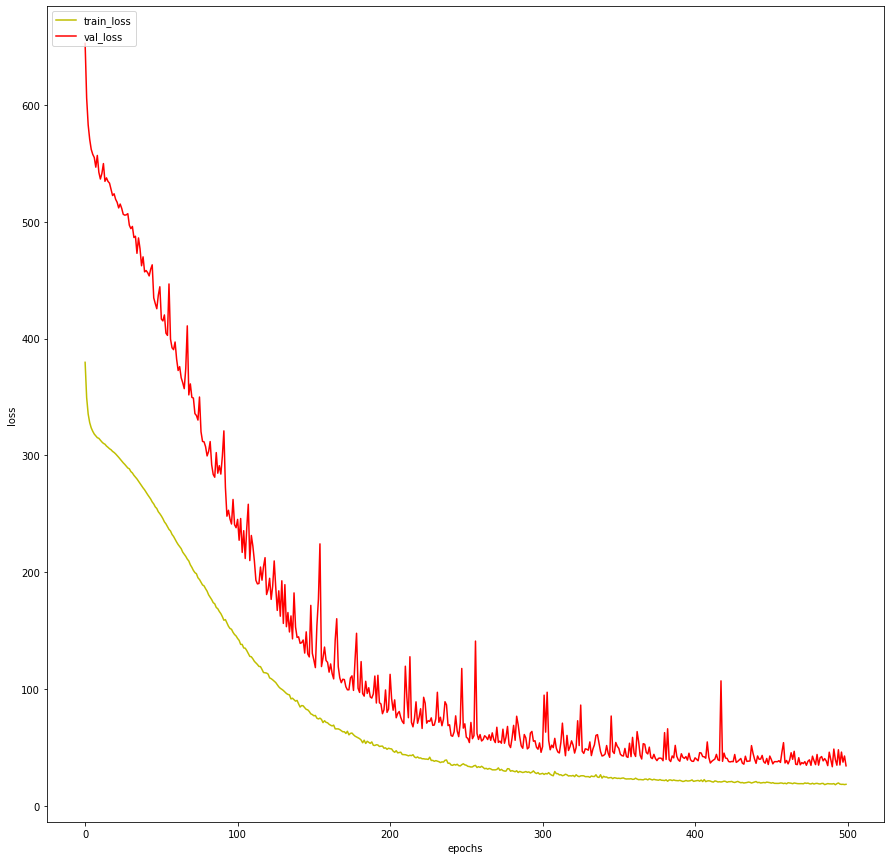

In [78]:
plt.plot(hist.history['loss'], 'y', label='train_loss')
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [30]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [31]:
plt.show()

In [ ]:
plt.plot(hist.history['loss'], 'y', label='train_loss')
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [25, 25] # [width, height] (inches)
plt.show()

In [79]:
loss, mae = model.evaluate(X_test, Y_test)
print(loss, mae)

4380/4380 [==============================] - 0s 61us/step
276.76036239693696 5.5182905197143555


In [80]:
model.load_weights('./best_model_20000_80_RMSProp'+'.h5')

In [81]:
loss, mae = model.evaluate(X_test, Y_test)

4380/4380 [==============================] - 0s 105us/step
